In [1]:
import sys
home_dir = "../"
sys.path.append(home_dir)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
# import matplotlib.ticker as ticker
from sklearn.metrics import roc_auc_score
import seaborn as sns


In [2]:
per_fl_df = pd.read_csv('../data/SCOPe/ranking_results/prottrans_t5_bfd/fold/th_30/results_per_fold.tsv', sep='\t')

In [3]:
per_fl_df

,fold,auroc,auprc,hit1,hit10,avg_n_true_pos,avg_n_true_neg,n_queries
0,a.1,0.366019,0.000654,0.000000,0.000000,7.219512,10329.0,41
1,a.10,0.943381,0.001266,0.000000,0.000000,1.500000,10366.0,4
2,a.102,0.918358,0.183399,0.594595,0.864865,24.216216,10333.0,37
3,a.11,0.381794,0.000195,0.000000,0.000000,2.666667,10364.0,6
4,a.118,0.742082,0.091469,0.449664,0.738255,110.375839,10221.0,149
...,...,...,...,...,...,...,...,...
134,g.2,0.986804,0.063300,0.000000,0.750000,3.000000,10366.0,4
135,g.3,0.990082,0.457764,0.528000,0.968000,104.496000,10245.0,125
136,g.41,0.939503,0.198027,0.448980,0.836735,42.734694,10321.0,49
137,g.50,0.983886,0.066995,0.125000,0.187500,3.500000,10354.0,16


In [4]:
top_df = per_fl_df[(per_fl_df['n_queries']>5) & (per_fl_df['auroc']==1)]

des_df = pd.read_csv('../../datasets/SCOPe/dir.des.scope.2.08-stable.txt',skiprows=4,sep='\t',names=['id','level','scc','name','description'])

In [5]:
top_df = top_df.merge(des_df,left_on = 'fold',right_on='scc',how='left')#[['superfamily','description','auroc','avg_n_true_pos','n_queries']]

In [6]:
des_df

,id,level,scc,name,description
0,46456,cl,a,-,All alpha proteins
1,46457,cf,a.1,-,Globin-like
2,46458,sf,a.1.1,-,Globin-like
3,46459,fa,a.1.1.1,-,Truncated hemoglobin
4,46460,dm,a.1.1.1,-,Protozoan/bacterial hemoglobin
...,...,...,...,...,...
397950,286555,px,l.1.1.1,d2ehoc3,2eho C:0-0
397951,286556,px,l.1.1.1,d2ehof3,2eho F:0-0
397952,286557,px,l.1.1.1,d2ehog3,2eho G:0-0
397953,286558,px,l.1.1.1,d2ehok3,2eho K:0-0


In [7]:
top_df

,fold,auroc,auprc,hit1,hit10,avg_n_true_pos,avg_n_true_neg,n_queries,id,level,scc,name,description


In [8]:
bottom_df = per_fl_df[(per_fl_df['n_queries']>5)].sort_values(by='auroc')


bottom_df = bottom_df.merge(des_df,left_on = 'fold',right_on='scc',how='left')[['fold','description','auroc','avg_n_true_pos','n_queries']]

In [9]:
bottom_df.head(10)


,fold,description,auroc,avg_n_true_pos,n_queries
0,c.47,Thioredoxin fold,0.139491,1.985294,136
1,d.13,HIT-like,0.192607,1.846154,13
2,a.1,Globin-like,0.366019,7.219512,41
3,a.11,Acyl-CoA binding protein-like,0.381794,2.666667,6
4,d.26,FKBP-like,0.390610,10.090909,22
5,d.153,Ntn hydrolase-like,0.400687,1.923077,26
6,d.95,Homing endonuclease-like,0.429786,1.846154,13
7,c.67,PLP-dependent transferase-like,0.442523,3.924051,79
8,a.29,Bromodomain-like,0.511446,35.348837,43
9,b.88,Mss4-like,0.514770,2.857143,7


In [10]:
print(bottom_df.head(10).to_latex(index=False))

\begin{tabular}{llrrr}
\toprule
 fold &                    description &    auroc &  avg\_n\_true\_pos &  n\_queries \\
\midrule
 c.47 &               Thioredoxin fold & 0.139491 &        1.985294 &        136 \\
 d.13 &                       HIT-like & 0.192607 &        1.846154 &         13 \\
  a.1 &                    Globin-like & 0.366019 &        7.219512 &         41 \\
 a.11 &  Acyl-CoA binding protein-like & 0.381794 &        2.666667 &          6 \\
 d.26 &                      FKBP-like & 0.390610 &       10.090909 &         22 \\
d.153 &             Ntn hydrolase-like & 0.400687 &        1.923077 &         26 \\
 d.95 &       Homing endonuclease-like & 0.429786 &        1.846154 &         13 \\
 c.67 & PLP-dependent transferase-like & 0.442523 &        3.924051 &         79 \\
 a.29 &               Bromodomain-like & 0.511446 &       35.348837 &         43 \\
 b.88 &                      Mss4-like & 0.514770 &        2.857143 &          7 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_3922574/4273683062.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(bottom_df.head(10).to_latex(index=False))


In [11]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (8, 6)  # Set the size to 10x8 inches


In [12]:
model_names_dict = {"hhblits":"HHblits","tapebert":"TAPE-BERT", "proteinbert": "ProteinBERT", "esm2_t33_650M_UR50D":"ESM2", "esm1b_t33_650M_UR50S":"ESM1b", 
                    "prottrans_bert_bfd": "Prottrans-BERT", "prottrans_albert_bfd":"Prottrans-ALBERT", "prottrans_t5_bfd":"Prottrans-T5"}
baseline_model_names_dict = {"hhblits":"HHblits"}
metric_names_dict = {"aurocs":"AUROC", "auprcs":"AUPRC", "hit1s":"Hit@1", "hit10s":"Hit@10"}
ths = [10, 20, 30, 40, 70, 95]
colors_dict = {"aurocs": ["purple", "crimson", "mediumvioletred", "hotpink", "pink", "lavenderblush"],
               "auprcs": ["darkred", "red", "orangered", "darkorange", "goldenrod", "darkkhaki"],
               "hit1s": ["darkolivegreen", "forestgreen", "teal", "cadetblue", "skyblue", "lightblue"],
               "hit10s": ["darkblue", "darkslateblue", "indigo", "darkviolet", "mediumorchid", "plum"]}

In [13]:
metrics_df = pd.DataFrame(index=ths, columns=metric_names_dict.values())

for th in ths:
    df = pd.read_csv('../data/SCOPe/ranking_results/random/fold/th_'+str(th)+'/weighted_results.tsv', sep='\t')
    for metric in metric_names_dict.keys():
        metrics_df.loc[th, metric_names_dict[metric]] = df[metric[:-1]].iloc[1]

metrics_df.index.name='th'

print(metrics_df.reset_index().to_latex())

\begin{tabular}{lrllll}
\toprule
{} &  th &     AUROC &     AUPRC &     Hit@1 &    Hit@10 \\
\midrule
0 &  10 &  0.499554 &  0.002977 &  0.004416 &  0.025841 \\
1 &  20 &  0.502778 &   0.00282 &  0.003466 &   0.02413 \\
2 &  30 &  0.500512 &  0.002577 &  0.002082 &  0.022604 \\
3 &  40 &  0.504705 &  0.002633 &  0.001045 &  0.019973 \\
4 &  70 &  0.501828 &   0.00245 &  0.002274 &  0.024621 \\
5 &  95 &  0.499055 &  0.002222 &  0.000834 &  0.025259 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_3922574/1560881303.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.reset_index().to_latex())


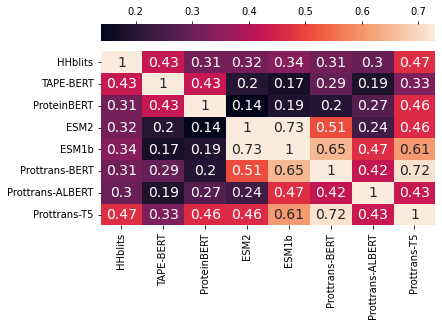

In [14]:
from sklearn.metrics import cohen_kappa_score
from scipy.stats import spearmanr

prev = per_fl_df['fold']
rankings = []
for mn in model_names_dict.keys():
    per_fl_df = pd.read_csv('../data/SCOPe/ranking_results/'+mn+'/fold/th_30/results_per_fold.tsv', sep='\t')
    # per_fl_df = per_fl_df[per_fl_df['n_queries']>10]
    # assert(all( prev == per_fl_df['fold']))
    prev = per_fl_df['fold']
    rankings.append(per_fl_df['auroc'])#.rank().astype(int))

len(model_names_dict.values())

agreement_matrix = pd.DataFrame(index=model_names_dict.values(), columns=model_names_dict.values())

for i, ranking1 in enumerate(rankings):
    for j, ranking2 in enumerate(rankings):
            agreement = spearmanr(ranking1, ranking2).statistic
            agreement_matrix.loc[list(model_names_dict.values())[i],list(model_names_dict.values())[j]] = agreement
            # if i==j:
            #      agreement_matrix.loc[list(model_names_dict.values())[i],list(model_names_dict.values())[j]]=0

sns.heatmap(agreement_matrix.astype(float),annot=True,vmax=0.73,cbar_kws = dict(use_gridspec=False,location="top"), annot_kws={"size": 14})
plt.savefig('plots_performance_comparison/intermodel_fl_difficulty_spearman.svg', bbox_inches='tight')

In [15]:
agreement_matrix_fl = agreement_matrix

In [16]:
prev = per_fl_df['fold']
rankings = []
scores = []
for mn in model_names_dict.keys():
    per_fl_df = pd.read_csv('../data/SCOPe/ranking_results/'+mn+'/fold/th_30/results_per_fold.tsv', sep='\t')
    per_fl_df = per_fl_df[per_fl_df['n_queries']>5]
    # assert(all( prev == per_fl_df['fold']))
    prev = per_fl_df['fold']
    rankings.append(per_fl_df['auroc'].rank().astype(int))
    scores.append(per_fl_df['auroc'])


In [17]:
compare_df = pd.DataFrame([per_fl_df['fold'],rankings[0],rankings[-1],scores[0],scores[-1]],
                          index=['fold','hhblits','prottrans-t5','hhblits_auc','prottrans-t5_auc']).T

In [18]:
compare_df  = compare_df.merge(des_df,left_on = 'fold',right_on='scc',how='left')

In [19]:
compare_df['diff'] = compare_df.apply(lambda row: row['hhblits_auc']-row['prottrans-t5_auc'],axis=1)

In [20]:
compare_df

,fold,hhblits,prottrans-t5,hhblits_auc,prottrans-t5_auc,id,level,scc,name,description,diff
0,a.1,2,3,0.407503,0.366019,46457,cf,a.1,-,Globin-like,0.041484
1,a.102,83,98,0.709609,0.918358,48207,cf,a.102,-,alpha/alpha toroid,-0.208749
2,a.11,107,4,0.942437,0.381794,47026,cf,a.11,-,Acyl-CoA binding protein-like,0.560643
3,a.118,46,52,0.59219,0.742082,48370,cf,a.118,-,alpha-alpha superhelix,-0.149892
4,a.137,27,56,0.533366,0.756932,48661,cf,a.137,-,Non-globular all-alpha subunits of globular pr...,-0.223566
...,...,...,...,...,...,...,...,...,...,...,...
102,f.23,98,97,0.775112,0.917656,81407,cf,f.23,-,Single transmembrane helix,-0.142543
103,f.4,93,94,0.748911,0.890469,56924,cf,f.4,-,Transmembrane beta-barrels,-0.141558
104,g.3,102,107,0.848245,0.990082,57015,cf,g.3,-,"Knottins (small inhibitors, toxins, lectins)",-0.141837
105,g.41,105,100,0.904389,0.939503,57769,cf,g.41,-,Rubredoxin-like,-0.035114


In [21]:
print(compare_df.sort_values(by='diff',ascending=True).head(10)[['fold','description','hhblits_auc','prottrans-t5_auc' ]].to_latex(index=False)
)# compare_df = compare_df.sort_values(by='diff',ascending=True).head(15)

\begin{tabular}{llll}
\toprule
fold &                                 description & hhblits\_auc & prottrans-t5\_auc \\
\midrule
a.38 &                                    HLH-like &    0.223821 &         0.836111 \\
d.87 & CO dehydrogenase flavoprotein C-domain-like &     0.46142 &         0.829372 \\
d.96 &                                      T-fold &    0.434117 &         0.798999 \\
 f.1 &      Toxins' membrane translocation domains &    0.603743 &         0.963628 \\
b.72 &                              WW domain-like &    0.640149 &         0.977857 \\
b.81 &      Single-stranded left-handed beta-helix &      0.4654 &         0.796808 \\
b.30 &                               Supersandwich &    0.525955 &         0.831033 \\
b.24 &   Hyaluronate lyase-like, C-terminal domain &    0.695959 &         0.984502 \\
 d.9 &                                    IL8-like &         0.5 &         0.773909 \\
b.80 &     Single-stranded right-handed beta-helix &    0.458127 &         0.728484 \\
\

/tmp/ipykernel_3922574/4143932147.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(compare_df.sort_values(by='diff',ascending=True).head(10)[['fold','description','hhblits_auc','prottrans-t5_auc' ]].to_latex(index=False)


In [22]:
print(compare_df.sort_values(by='diff',ascending=False).head(10)[['fold','description','hhblits_auc','prottrans-t5_auc' ]].to_latex(index=False))

\begin{tabular}{llll}
\toprule
 fold &                                 description & hhblits\_auc & prottrans-t5\_auc \\
\midrule
 a.11 &               Acyl-CoA binding protein-like &    0.942437 &         0.381794 \\
 c.47 &                            Thioredoxin fold &    0.529256 &         0.139491 \\
 d.13 &                                    HIT-like &         0.5 &         0.192607 \\
d.153 &                          Ntn hydrolase-like &    0.644685 &         0.400687 \\
 c.44 & Phosphotyrosine protein phosphatases I-like &    0.739438 &         0.550051 \\
 d.95 &                    Homing endonuclease-like &    0.583013 &         0.429786 \\
 d.26 &                                   FKBP-like &         0.5 &          0.39061 \\
 a.40 &                              CH domain-like &    0.750201 &         0.645943 \\
 c.67 &              PLP-dependent transferase-like &    0.540852 &         0.442523 \\
 a.28 &                   Acyl carrier protein-like &    0.611769 &         0.

/tmp/ipykernel_3922574/2424353838.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(compare_df.sort_values(by='diff',ascending=False).head(10)[['fold','description','hhblits_auc','prottrans-t5_auc' ]].to_latex(index=False))


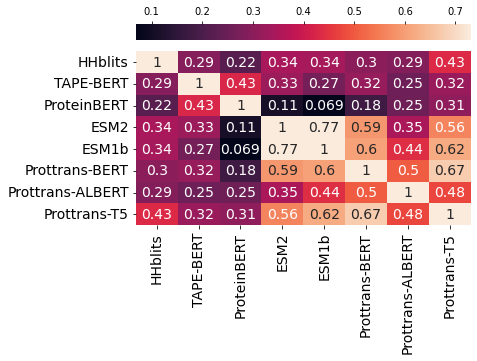

In [23]:
from sklearn.metrics import cohen_kappa_score
from scipy.stats import spearmanr
per_query_df = pd.read_csv('../data/SCOPe/ranking_results/'+mn+'/fold/th_30/results_per_query.tsv', sep='\t')

prev = per_query_df['fold']
rankings = []
for mn in model_names_dict.keys():
    per_query_df = pd.read_csv('../data/SCOPe/ranking_results/'+mn+'/fold/th_30/results_per_query.tsv', sep='\t')
    # per_query_df = per_query_df[per_query_df['n_queries']>10]
    assert(all( prev == per_query_df['fold']))
    prev = per_query_df['fold']
    rankings.append(per_query_df['auroc'])#.rank().astype(int))

len(model_names_dict.values())

agreement_matrix = pd.DataFrame(index=model_names_dict.values(), columns=model_names_dict.values())

for i, ranking1 in enumerate(rankings):
    for j, ranking2 in enumerate(rankings):
            agreement = spearmanr(ranking1, ranking2).statistic
            agreement_matrix.loc[list(model_names_dict.values())[i],list(model_names_dict.values())[j]] = agreement
            # if i==j:
            #      agreement_matrix.loc[list(model_names_dict.values())[i],list(model_names_dict.values())[j]]=0

sns.heatmap(agreement_matrix.astype(float),annot=True,vmax=0.73,cbar_kws = dict(use_gridspec=False,location="top"), annot_kws={"size": 14})
plt.xticks(fontsize=14)  # Adjust the size as needed for x-axis tick labels
plt.yticks(fontsize=14)  # Adjust the size as needed for y-axis tick labels
plt.savefig('plots_performance_comparison/intermodel_query_difficulty_spearman_perquery.svg', bbox_inches='tight')

In [24]:
agreement_matrix_fl

,HHblits,TAPE-BERT,ProteinBERT,ESM2,ESM1b,Prottrans-BERT,Prottrans-ALBERT,Prottrans-T5
HHblits,1.0,0.428196,0.313153,0.315469,0.337109,0.306993,0.29727,0.46897
TAPE-BERT,0.428196,1.0,0.425001,0.199191,0.174378,0.292547,0.185687,0.326427
ProteinBERT,0.313153,0.425001,1.0,0.137674,0.190786,0.196309,0.269878,0.462107
ESM2,0.315469,0.199191,0.137674,1.0,0.732696,0.509428,0.239823,0.46272
ESM1b,0.337109,0.174378,0.190786,0.732696,1.0,0.647388,0.468564,0.605215
Prottrans-BERT,0.306993,0.292547,0.196309,0.509428,0.647388,1.0,0.420372,0.715385
Prottrans-ALBERT,0.29727,0.185687,0.269878,0.239823,0.468564,0.420372,1.0,0.429832
Prottrans-T5,0.46897,0.326427,0.462107,0.46272,0.605215,0.715385,0.429832,1.0


In [25]:
rows, cols = np.triu_indices_from(agreement_matrix_fl, k=1) 

In [26]:
agreement_matrix_fl.values[rows, cols] = agreement_matrix.values[rows, cols]

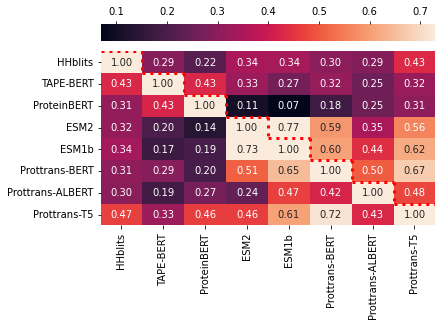

In [33]:
# sns.heatmap(agreement_matrix_fl.astype(float),annot=True,vmax=0.73,cbar_kws = dict(use_gridspec=False,location="top"), annot_kws={"size": 14},fmt=".2f")
sns.heatmap(agreement_matrix_fl.astype(float),annot=True,vmax=0.73,cbar_kws = dict(use_gridspec=False,location="top"), fmt=".2f")

# plt.xticks(fontsize=14)  # Adjust the size as needed for x-axis tick labels
# plt.yticks(fontsize=14)  # Adjust the size as needed for y-axis tick labels
ax = plt.gca()

# Get the dimensions of the matrix
n = agreement_matrix_fl.shape[0]

# Draw a dotted red line following the cell borders above the diagonal
for k in range(n):
    i=k-1
    j=i+1
    ax.plot([j, j+1], [i+1, i+1], color='red', linestyle=':', linewidth=3)
    # Right border
    ax.plot([j, j], [i, i+1], color='red', linestyle=':', linewidth=3)
plt.savefig('plots_performance_comparison/intermodel_query_and_fl_difficulty_spearman_perquery.pdf', bbox_inches='tight')